In [1]:
import kagglehub
path = kagglehub.dataset_download("uciml/iris")
print("Path to dataset files:", path)
!mv /root/.cache/kagglehub/datasets/uciml/iris/versions/2/* /content

100%|██████████| 3.60k/3.60k [00:00<00:00, 586kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/iris/versions/2


In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,log_loss,precision_score, recall_score, f1_score, cohen_kappa_score

In [3]:
data = pd.read_csv('/content/Iris.csv')
data = data.drop(['Id'],axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Проверка на нулевые данные

In [ ]:
data.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
set(data['Species'].values)

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

Распределение классов

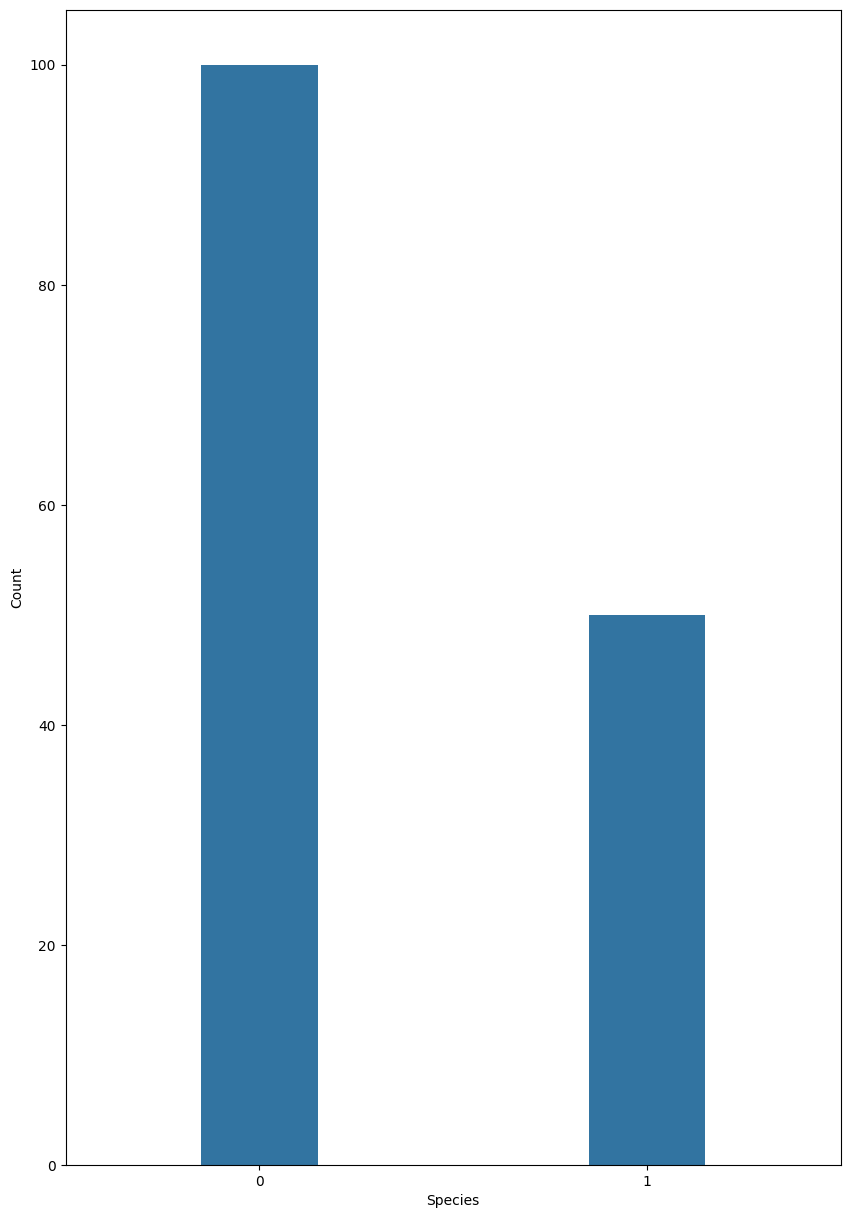

In [ ]:
classes = data['Species'].value_counts().reset_index()
classes.columns=['Species','Count']
plt.figure(figsize=(10,15))
sns.barplot(x='Species',y='Count',data=classes,width=0.3)
plt.show()

Подготовка данных

In [4]:
def replace(x):
  if x=='Iris-setosa':
    return 1
  else:
    return 0
data['Species'] = data['Species'].apply(lambda x: replace(x))
data.rename(columns={'Species':'IsIris-setosa'})
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [25]:
y = data['Species']
x = data.drop('Species',axis=1)

In [10]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y.head()

,Species
0,1
1,1
2,1
3,1
4,1


In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [27]:
print(f"Тренировочный {x_train.shape}")
print(f"Тестовый {x_test.shape}")
print(f"Тренировочный переменная{y_train.shape}")
print(f"Тестовый переменная {y_test.shape}")

Тренировочный (135, 4)
Тестовый (15, 4)
Тренировочный переменная(135,)
Тестовый переменная (15,)


In [28]:
std_slc = StandardScaler()
std_slc.fit(x_train)
x_train_std = std_slc.transform(x_train)
x_test_std = std_slc.transform(x_test)

In [29]:
x_train_std.shape

(135, 4)

In [38]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

In [31]:
model = LogisticRegression()
model.fit(x_train_std,y_train)

LogisticRegression()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


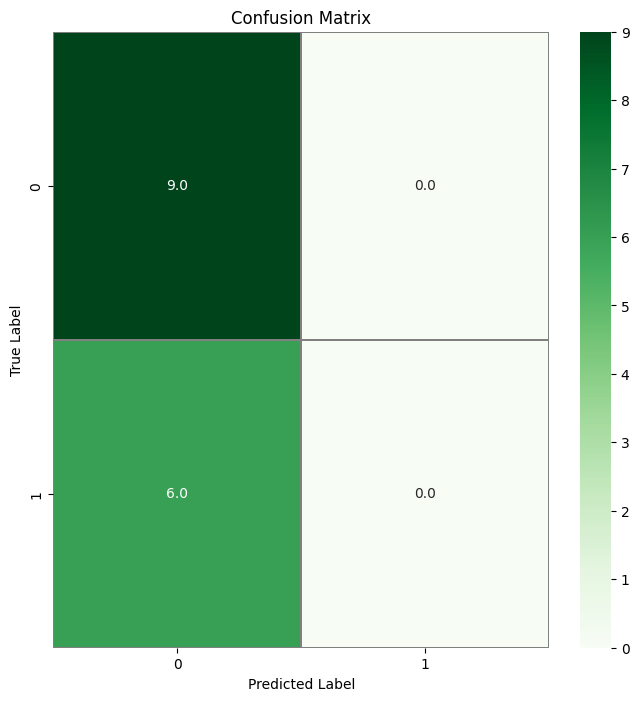

In [39]:
y_pred_var = model.predict_proba(x_test)
y_pred = model.predict(x_test)
confusion_mtx = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [47]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_var[:,1], multi_class='ovr')
loss = log_loss(y_test, y_pred_var)
metrics = {
    'Accuracy' : accuracy,
    'Precision' : precision,
    'Recall' : recall,
    'F1 Score' : f1,
    'ROC-AUC': roc_auc,
    'Log loss': loss,
}

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [53]:
for name,var in metrics.items():
  print(f"{name} = {var}")

Accuracy = 0.6
Precision = 0.3
Recall = 0.5
F1 Score = 0.375
ROC-AUC = 1.0
Log loss = 2.7425756135618453
